In [11]:
import netrc
netrc = netrc.netrc()
remoteHostName = "ooinet.oceanobservatories.org"
info = netrc.authenticators(remoteHostName)
username = info[0]
token = info[2]

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import netCDF4 as nc
import numpy as np

import requests
import datetime

In [4]:
subsite = 'RS01SBPS'
node = 'PC01A'
sensor = '4B-PHSENA102'
method = 'streamed'
stream = 'phsen_data_record'
beginDT = '2017-08-21T07:00:00.000Z'
# beginDT = (datetime.datetime.utcnow() - datetime.timedelta(days=2)).strftime("%Y-%m-%dT%H:%M:%S.000Z")
endDT = '2017-08-22T07:00:00.000Z'

In [5]:
base_url = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv'

data_request_url ='/'.join((base_url,subsite,node,sensor,method,stream))
params = {
    'beginDT':beginDT,
    'endDT':endDT,
    'limit':20000,   
}

r = requests.get(data_request_url, params=params,auth=(username, token))
data = r.json()

In [10]:
len(data)
data[0]

{'checksum': 139,
 'ctdpf_sbe43_sample-practical_salinity': 33.94285689526693,
 'driver_timestamp': 3712287780.892228,
 'ingestion_timestamp': 3712287784.017,
 'internal_timestamp': 0.0,
 'ph_light_measurements': [3338,
  2374,
  2228,
  2453,
  3336,
  1599,
  2224,
  1964,
  3337,
  569,
  2228,
  1142,
  3337,
  222,
  2227,
  731,
  3342,
  264,
  2230,
  774,
  3337,
  421,
  2231,
  963,
  3342,
  651,
  2230,
  1202,
  3337,
  907,
  2230,
  1429,
  3338,
  1162,
  2226,
  1637,
  3339,
  1389,
  2228,
  1806,
  3340,
  1576,
  2224,
  1941,
  3341,
  1731,
  2230,
  2046,
  3342,
  1855,
  2229,
  2128,
  3341,
  1973,
  2227,
  2209,
  3339,
  2026,
  2228,
  2237,
  3341,
  2092,
  2229,
  2280,
  3340,
  2143,
  2228,
  2311,
  3340,
  2181,
  2227,
  2336,
  3339,
  2214,
  2227,
  2356,
  3339,
  2243,
  2226,
  2375,
  3338,
  2260,
  2228,
  2384,
  3339,
  2279,
  2232,
  2396,
  3338,
  2325,
  2226,
  2429],
 'ph_seawater': 7.698601738587833,
 'ph_seawater_qc_executed

In [16]:
time = []
pH = []
hour = []

for i in range(len(data)):
    time.append(nc.num2date(data[i]['time'],'seconds since 1900-01-01').replace(microsecond=0))
    pH.append(data[i]['ph_seawater'])
    hour.append((data[i]['time']-data[0]['time'])/3600)

In [18]:
len(pH)

24

I'm a little confused as to why there are only 24 data points for pH over the 24 period...si this right?

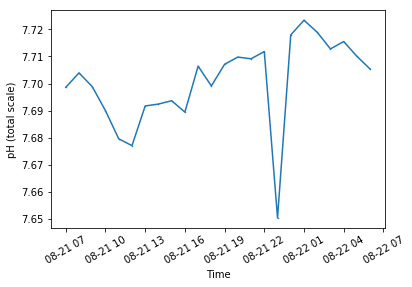

In [19]:
plt.plot(time, pH, marker=".", markersize=1, linestyle=None)
plt.ylabel('pH (total scale)')
plt.xlabel('Time')
plt.xticks(rotation=30)
#plt.tight_layout()
plt.show()

This needs to be synched with James' depth data.  